# Семинар 10: Трансформеры

## Вступление
Большинство современных методов моделирования языков опираются на архитектуру Transformer: BERT, GPT и их производные. Трансформеры используют attention как основные строительные блоки, из которых они построены. В последние пару лет применение архитектур, основанных на механизме внимания, пошло даже дальше естественных языков: Visual Transformer для картинок, Codex и ему подобные для программного кода. Помимо особенности в виде блоков внимания, трансформеры обычно используют и более продвинутую токенизацию — BPE. Поскольку этот тип моделей много лет (5 лет — это для дип лёрнинга много) является state-of-the-art решением для многих задач в самых разных областях, тулинг в этой области тоже продвинутый. Давайте же пойдём и разберёмся со всем этим. :)

Рекомендации для чтения:
1. [Оригинальная статья про Трансформер](https://arxiv.org/abs/1706.03762)
2. [Статья про BERT](https://arxiv.org/abs/1810.04805)
3. [Статья про GPT](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf)
4. [Блогпост про seq2seq и attention](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#Subword%20Segmentation:%20Byte%20Pair%20Encoding)

### План семинара
1. Смотрим на разные примеры токенизации текста и повторяем архитектуру BERT
2. Изучаем библиотеки от HuggingFace
3. Применяем готовую модель средствами HuggingFace
4. Файнтюним модель из `transformers` на лайтнинге

## 1. Смотрим на разные примеры токенизации текста  и повторяем архитектуру BERT
Перед тем, как обучать какую-либо модель, нам надо перевести текст в числа. Этот процесс называется векторизацией и делится на токенизацию и построение эмбеддингов. Про базовые подходы к токенизации мы с вами уже говорили: разбиение текста на отдельные символы, полиграммы символов или целые слова (тут можно накинуть знакомые нам стемминг и лемматизацию). Ну а про построение эмбеддингов мы с вами говорили, когда обсуждали Word2Vec и FastText.

В трансформерах дело обстоит по-своему: в качестве токенизации применяетеся алгоритм byte-pair encoding (BPE), а построение эмбеддингов является частью самой модели.

Давайте посмотрим всё это на картинках.

### Токенизаторы

#### По символам

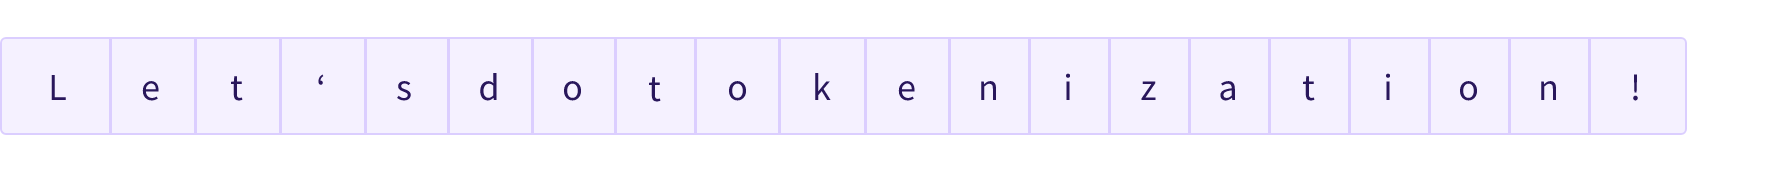

---
#### По словам
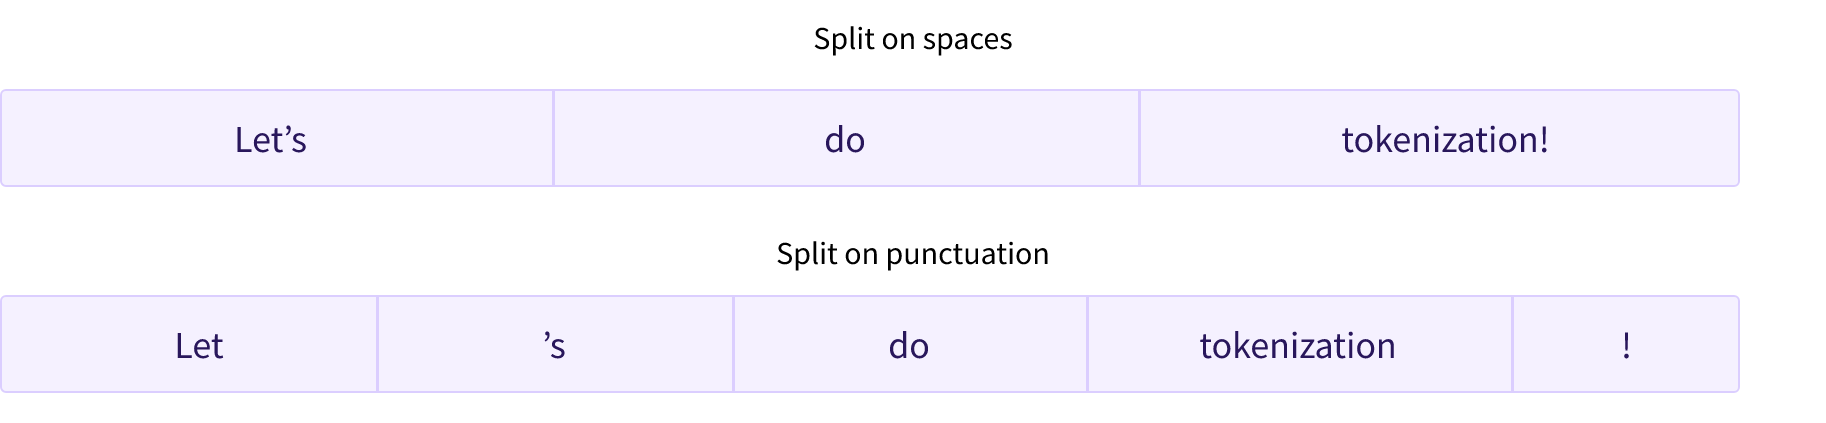

---
#### Byte-pair encoding
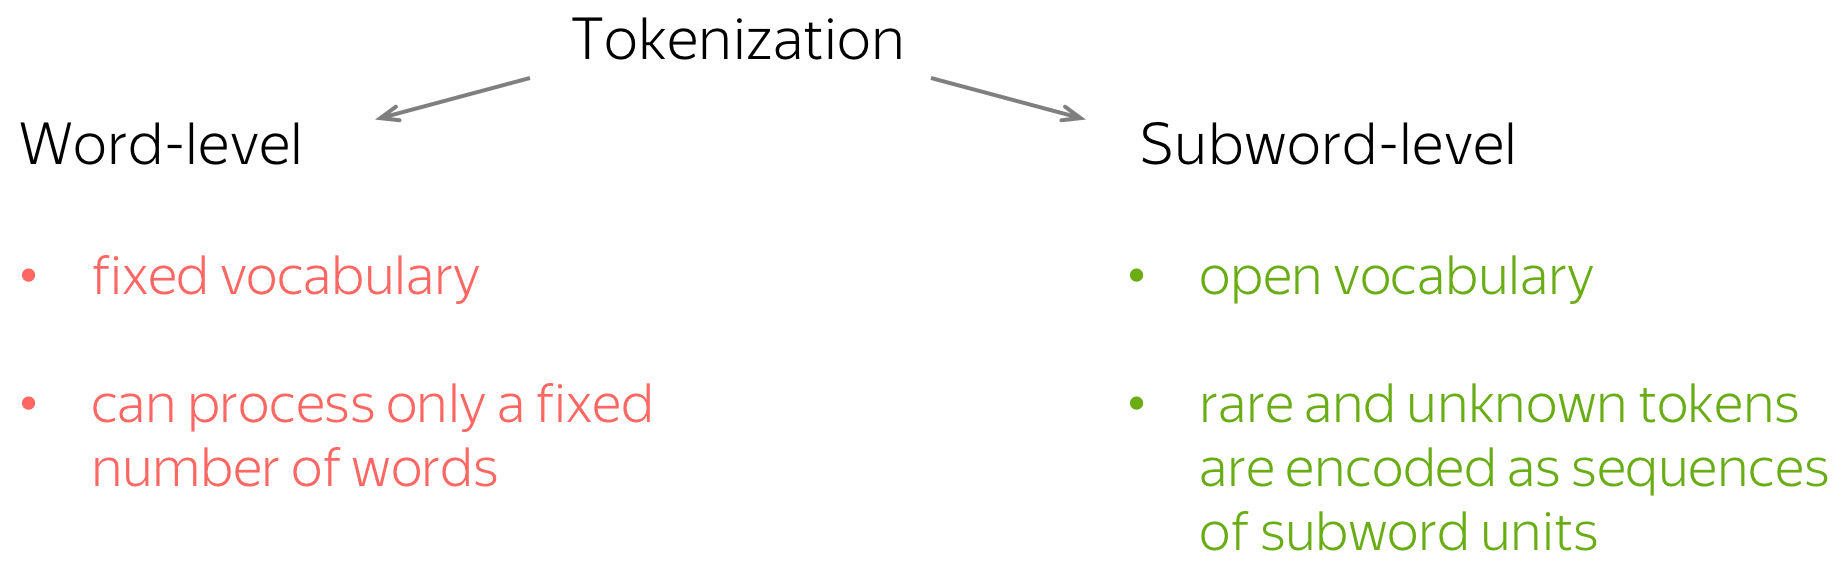

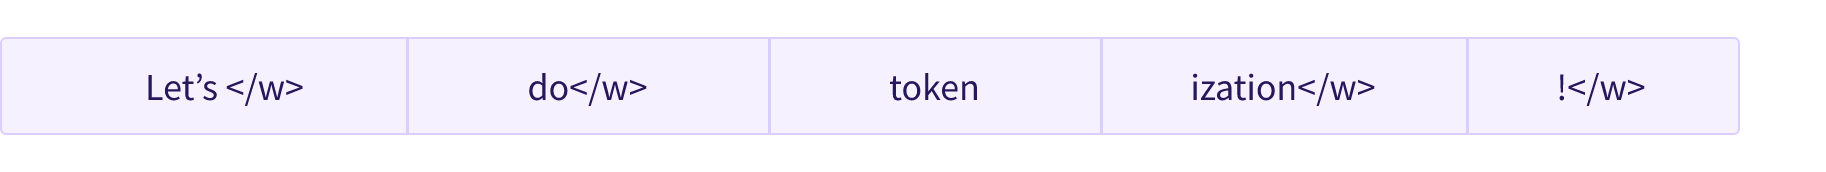

### BERT — Bidirectional Encoder Representations from Transformers

BERT — это нейронная сеть от Google, в 2017-2018 годах показавшая SOTA результаты на целом ряде задач. Эта модель очень активно применяется в различных продуктах, предполагающих обработку естественного языка: ответы на вопросы, заданные в произвольной форме; чат-боты; анализаторы граматики и стиля текста; автоматические переводчики и многое другое. Основную роль в архитектуре играет self-attention.

#### Обычная архитектура Transformer

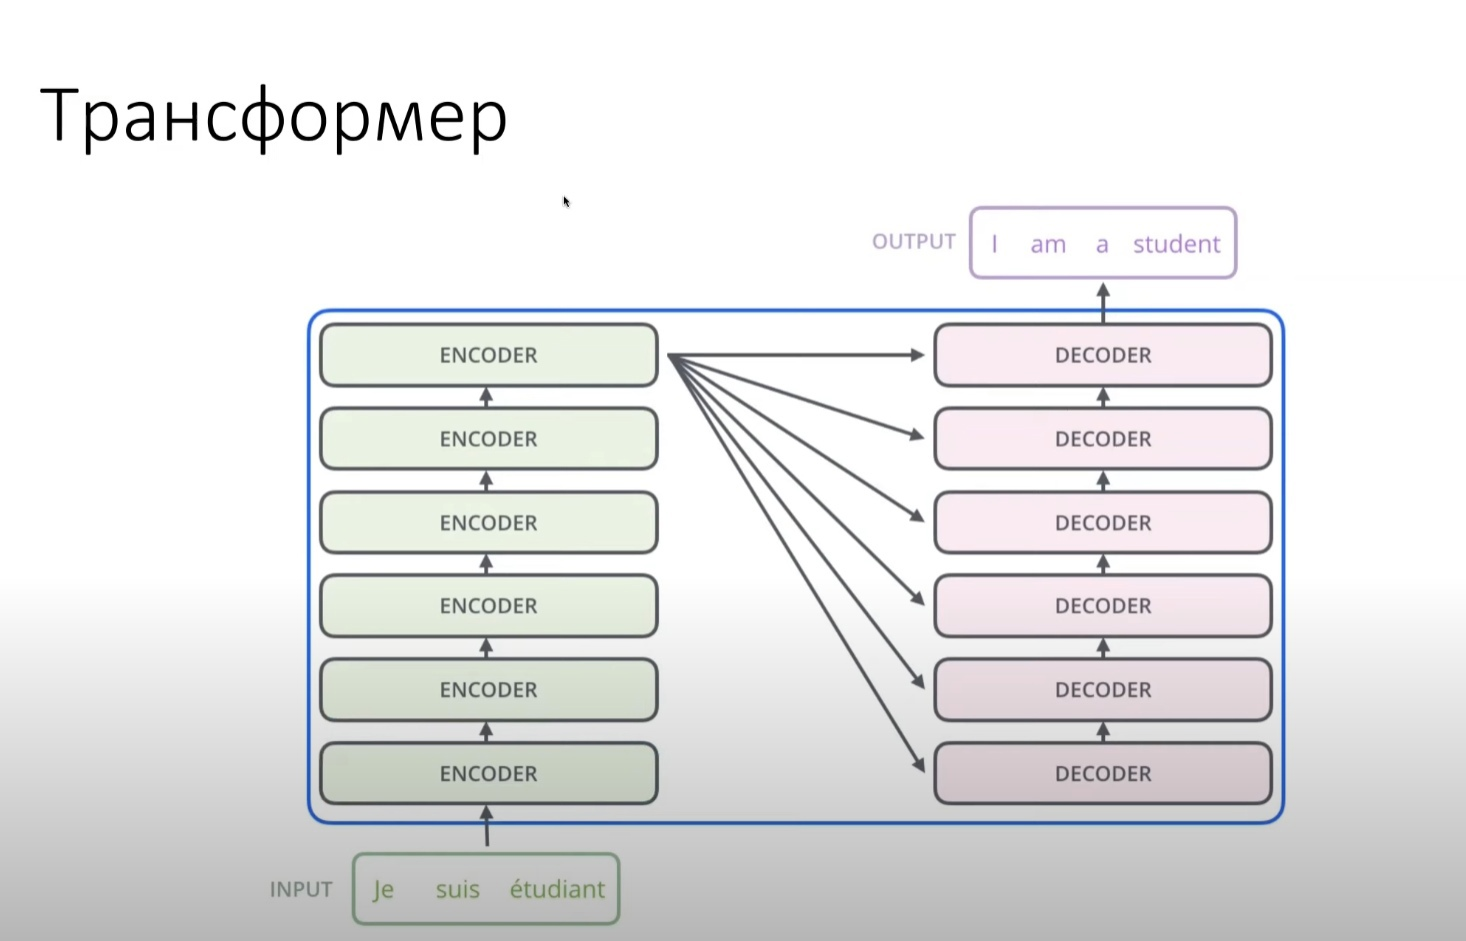


---
#### Кодировщик
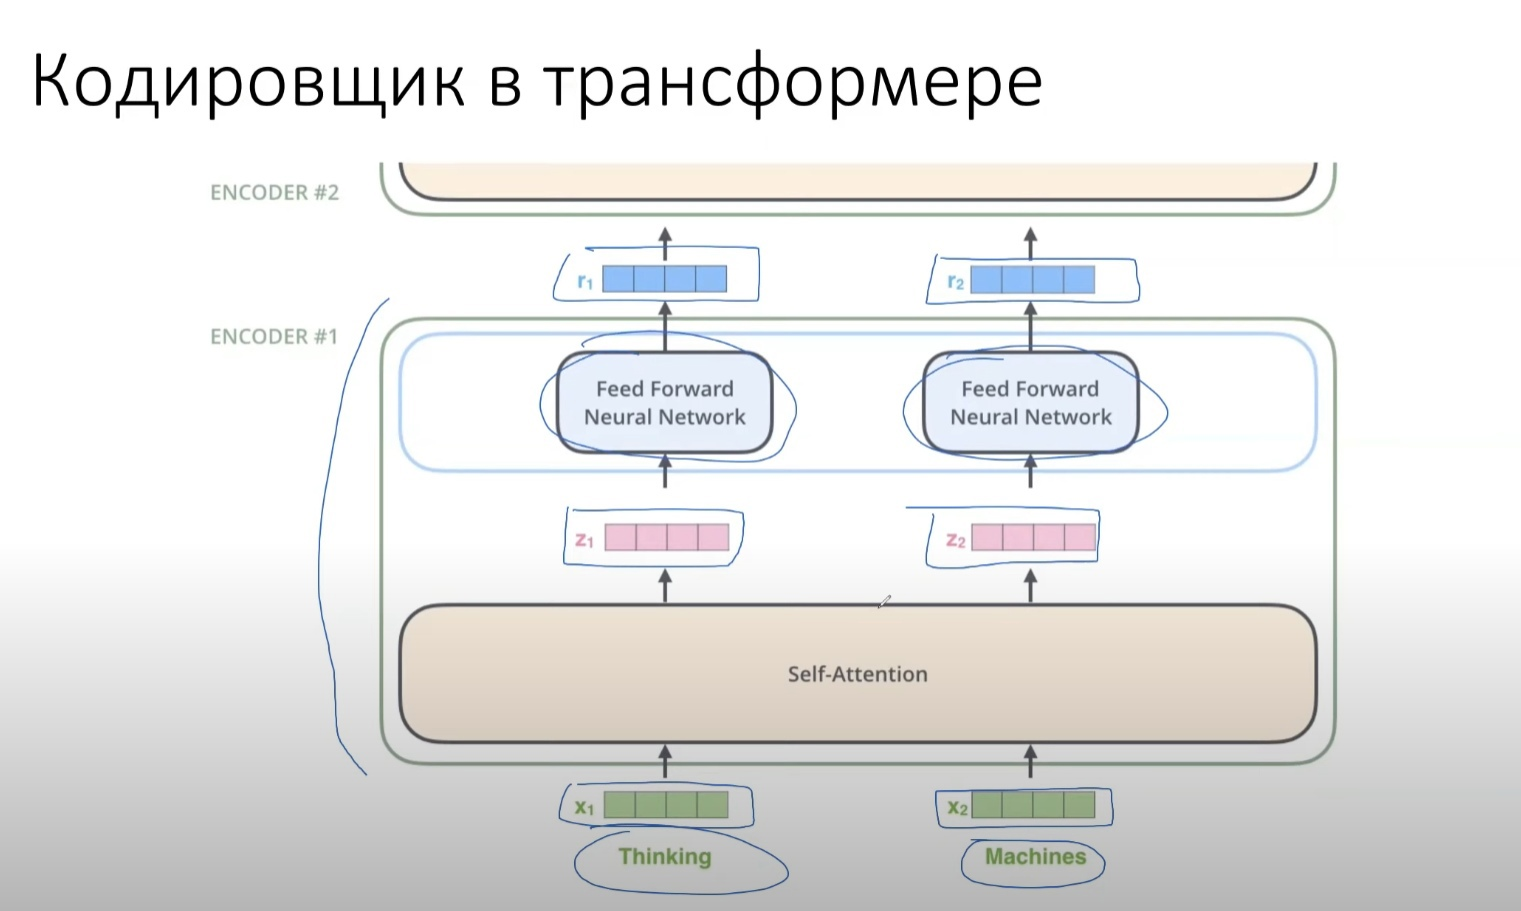

---
#### BERT
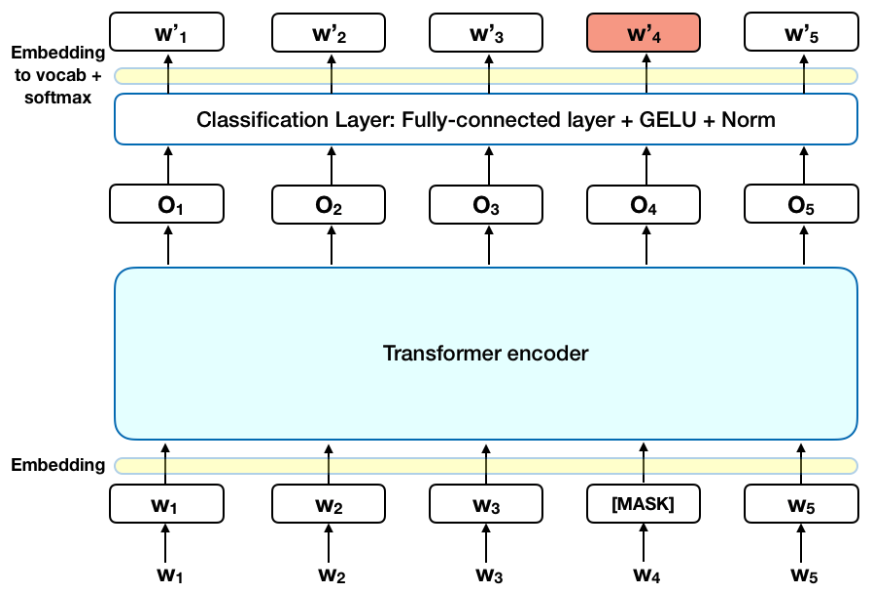

## 2. Изучаем библиотеки от HuggingFace
[HuggingFace](https://huggingface.co) — это своеобразный GitHub от мира глубинного обучения для NLP, который позволяет пользователям делиться своими моделями. На данный момент платформа содержит более 60k моделей (в том числе доступны предобученные тяжелые трансформеры) 6k наборов данных и 6k демонстрационных примеров.

Помимо хаба, компания HuggingFace разрабатывает и поддерживает библиотеку `tranformers`, в которой есть много полезного: токенизаторы; имплементации множества различных трансформеров; обёртки датастов и функционал для их скачивания; трейнер моделей (примерно как в лайтнинге). Эта библиотека позволяет в несколько строчек кода загружать и применять (или дообучать) предобученные модели. Чаще всего она используется в задачах обработки естественного языка, но также содержит в себе модели для работы с задачами компьютерного зрения, обработки аудио, видео и др. Список доступных моделей и поддерживаемых фреймворков можно найти на главной странице [документации](https://huggingface.co/docs/transformers/index).

И даже это не всё! HuggingFace разрабатывает и поддерживает библиотеку `datasets`, которая помогает работать с наборами данных для задач NLP, CV, обработки аудио. С ее помощью можно удобно и быстро изучить и подготовить набор данных для применения моделей глубинного обучения, а также получить доступ к стримингу данных (т. е. использованию без нагрузки на локальную машину). Последнее особенно полезно, если данных очень много, а доступных мощностей очень мало. Подробнее про библиотеку можно почитать в [документации](https://huggingface.co/docs/datasets/index).

Начнём с `transformers`. Давайте посмотрим на пример использования [BertTokenizer](hf.co/bert-base-cased):

In [2]:
from transformers import BertTokenizer

# основной интерфейс загрузки модели / токенизатора: 
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# также модель / токенизатор можно выгрузить, указав соответствующую директорию:
# BertTokenizer.from_pretrained("/home/saved/my_awesome_tokenizer/")

# если вы что-то меняли, то модель / токенизатор можно сохранить аналогичным образом:
# tokenizer.save_pretrained("/home/saved/directory_on_my_computer")

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [6]:
print("Токенизируем: ", tokenizer.tokenize("Let's do tokenization!"))
print("Токенизируем и переводим в индексы: ", tokenizer("Let's do tokenization!"))
print("Декодируем: ", tokenizer.decode(tokenizer("Let's do tokenization!")["input_ids"]))

Токенизируем:  ['Let', "'", 's', 'do', 'token', '##ization', '!']
Токенизируем и переводим в индексы:  {'input_ids': [101, 2421, 112, 188, 1202, 22559, 2734, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
Декодируем:  [CLS] Let's do tokenization! [SEP]


- `token_type_ids` и `attention_mask` — это дополнительные значения, которые могут пригодиться при использовании разных моделей. Например, если вы решаете задачу языкового моделирования, то вы наверняка захотите при помощи `attention_mask` замаскировать то, что модели надо предсказать (например, вторую половину предложения).

- `[CLS]` и `[SEP]` — это специальные токены, которые используются при обучении модели BERT. Первый используется для предсказания того, является ли часть B предложением, непосредственно следующим за частью A, а второй является токеном-разделителем. Токенизатор сам расставил их за нас в данном случае, но иногда приходится самостоятельно проставлять их руками.

**Важно:** мы посмотрели на токенизатор только модели bert-base-cased. У каждой обученной модели есть свой токенизатор, и важно использовать именно его для дообучения или инференса.

У токенизаторов есть много параметров батчинга (truncate, padding, special_tokens и т. д.). Посмотреть полный список можно [здесь](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call).

In [7]:
import torch
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = torch.tensor([[200, 200, 200]])
sequence2_ids = torch.tensor([[200, 200]])
batched_ids = torch.tensor([
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
])

print(model(sequence1_ids).logits)
print(model(sequence2_ids).logits)
print(model(batched_ids).logits)

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


In [10]:
batched_sequences = ["I am a robot and I hate humans", "I am a human and i hate robots very much"]
batched_ids = tokenizer(batched_sequences)["input_ids"]
batched_ids

[[101, 146, 1821, 170, 10975, 1105, 146, 4819, 3612, 102],
 [101, 146, 1821, 170, 1769, 1105, 178, 4819, 16013, 1304, 1277, 102]]

### 3. Применяем готовую модель средствами HuggingFace

Библиотека `transformers` предоставляет возможность использования пайплайнов ([pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines)), которые помогают упростить работу с моделями (и жизнь) при решении определенных задач.

Посмотрим на применение пайплайна модели `bert-base-uncased` для задачи fill-mask:

In [11]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
unmasker("Hello I'm a [MASK] model.")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

[{'score': 0.10731096565723419,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.08774467557668686,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.053383972495794296,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello i'm a new model."},
 {'score': 0.04667218402028084,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello i'm a super model."},
 {'score': 0.027095871046185493,
  'token': 2986,
  'token_str': 'fine',
  'sequence': "hello i'm a fine model."}]

## 4. Файнтюним модель из `transformers` на лайтнинге

А теперь перейдем к прикладной задаче. Проанализируем описания вакансий в Яндекс =)

Данные спаршены [отсюда](https://t.me/ya_jobs) и немного предобработаны.

### Данные

In [12]:
from datasets import load_dataset

jobs_dataset = load_dataset("Kirili4ik/yandex_jobs")  # https://huggingface.co/datasets/Kirili4ik/yandex_jobs
jobs_dataset = jobs_dataset["train"]  # на сайте нет разделения на val/test, поэтому мы сделаем его сами далее

Using custom data configuration Kirili4ik--yandex_jobs-40e7c62ad79f5d69


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /Users/semenkin.anton/.cache/huggingface/datasets/Kirili4ik___csv/Kirili4ik--yandex_jobs-40e7c62ad79f5d69/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

### Модель

Будем использовать модель [Т5](https://huggingface.co/docs/transformers/model_doc/t5). Это нейросетевая модель для понимания и генерации текста. Изобрели её в Google два года назад, и расшифровывается это название как text-to-text transfer transformer. Text-to-text означает, что модель T5 принимает на вход тексты и "читает" их энкодером, а потом "пишет" декодером новые тексты. Слово transfer говорит о цели этой модели: она предобучалась восстанавливать пропущенные фрагменты текста, но при желании её можно дообучить на новые задачи: перевод, перефразирование, суммаризация текстов, генерация диалоговых ответов, и т. п. [[источник](https://habr.com/ru/post/581932/)]

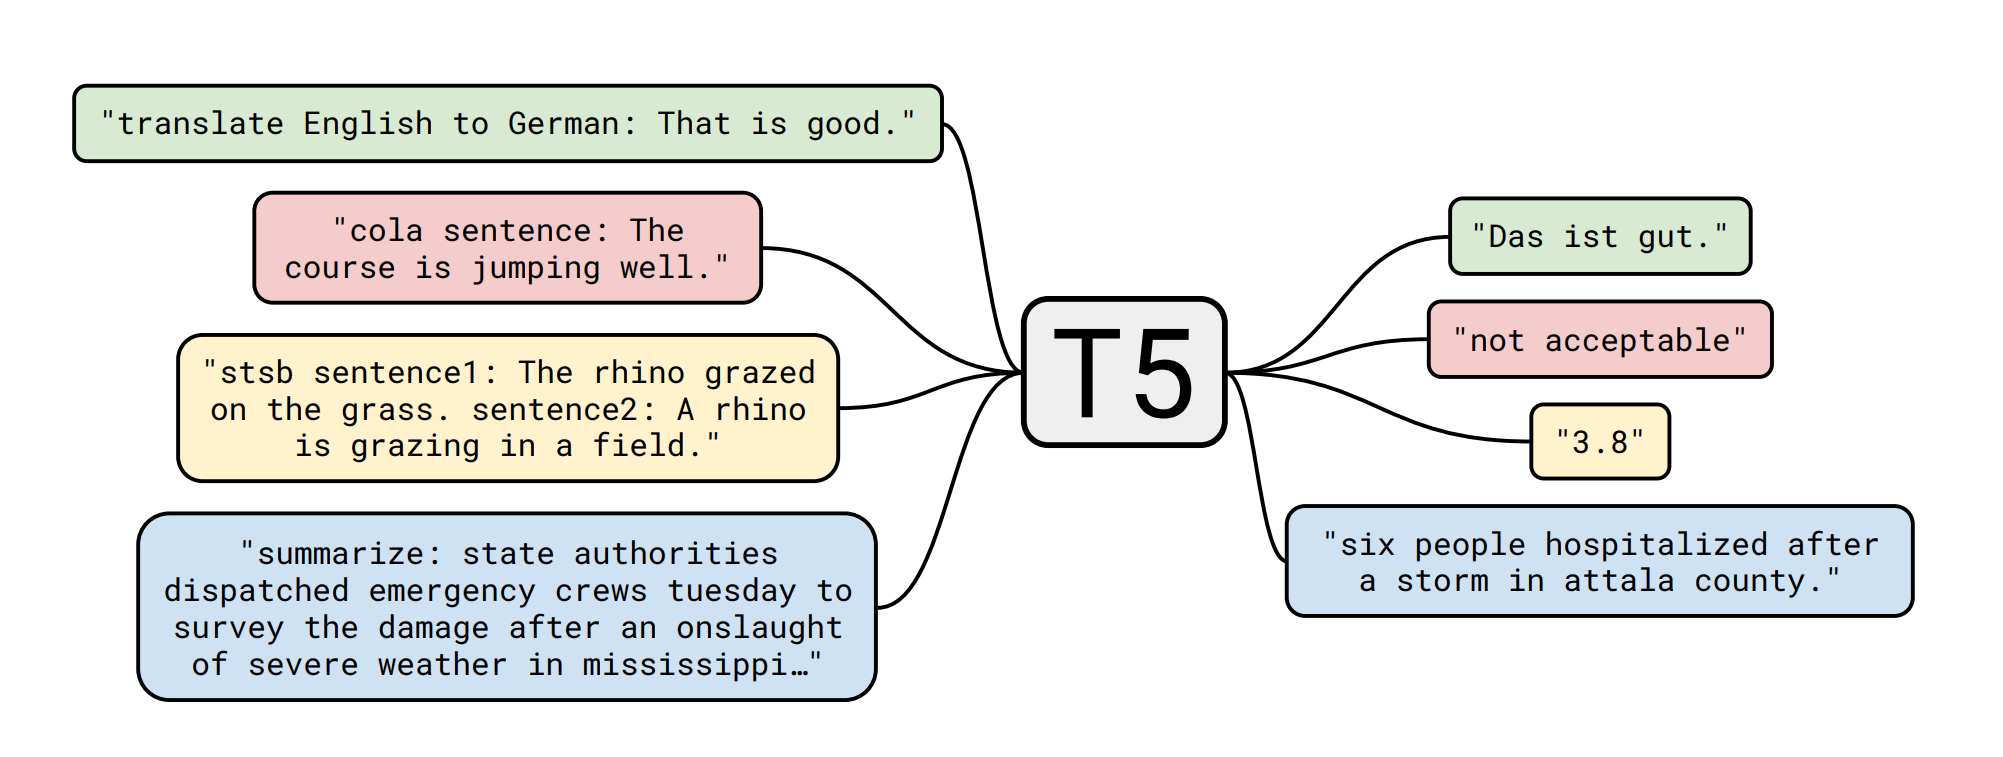

---
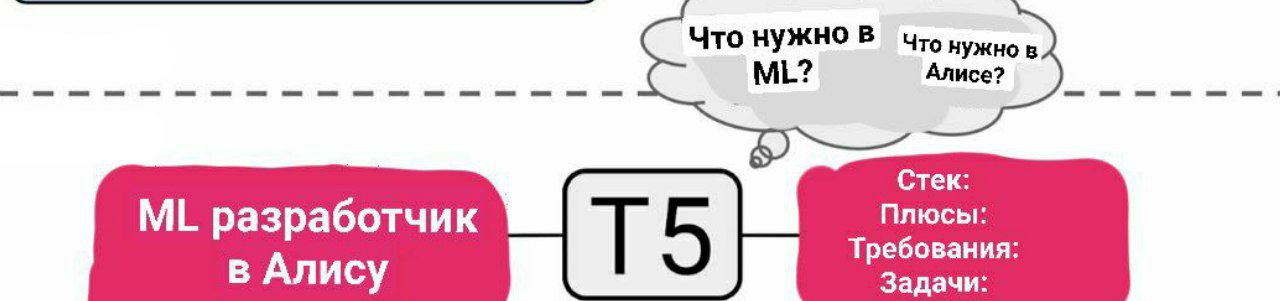

Мы будем использовать RuT5 — идейно то же самое, но на русском языке.

Задачу поставим такую: по краткой постановке ТЗ сгенерировать развернутое описание вакансии и требований к кандидату. Если RuT5 успешно справится, то мы уволим и оставим голодать целый HR отдел.

In [14]:
import os

import numpy as np
import pytorch_lightning as pl
import torch
import transformers
import wandb
from pytorch_lightning.callbacks import Callback, ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import T5Tokenizer, T5ForConditionalGeneration

### Класс датасета

In [ ]:
class JobsDataset(Dataset):
    def __init__(self, data_config):
        self.data_config = data_config
        
    def __len__(self):
        return len(self.data_config.jobs_dataset)

    def __getitem__(self, item):
        example = self.data_config.jobs_dataset[item]
        title = example["Header"]
        body = example["Description"] + "\n" + \
               example["Requirements"] + "\n" + \
               example["Tasks"] + "\n" + \
               example["Pluses"] + "\n" + \
               example["Hashtags"]
        return title, body

    def collate(self, examples):
        inputs, targets = list(zip(*examples))
        inputs = self.data_config.tokenizer(inputs, return_tensors="pt", padding=True)["input_ids"]
        targets = self.data_config.tokenizer(targets, return_tensors="pt", padding=True)["input_ids"]
        return inputs, targets

### Лайтнинг модуль

In [ ]:
class JobsGenerator(pl.LightningModule):
    def __init__(self, module_config):
        super().__init__()
        self.module_config = module_config
        self.learning_rate = module_config.learning_rate
        self.tokenizer = T5Tokenizer.from_pretrained(module_config.tokenizer_name)
        self.model = T5ForConditionalGeneration.from_pretrained(module_config.tokenizer_name)
        self.train_losses = []
        self.val_losses = []

    def training_step(self, batch, batch_idx):
        inp, out = batch
        loss = self.model(inp, labels=out).loss
        self.train_losses.append(loss.item())
        return loss
    
    def run_model_with_params_for_valtest(self, inp):
        with torch.inference_mode():
            predicted = self.model.generate(
                input_ids=inp,
                **self.config.val_generation_params
            )
        return predicted

    def validation_step(self, batch, batch_idx):
        inp, out = batch
        loss = self.model(inp, labels=out).loss
        self.val_losses.append(loss.item())
    
        if batch_idx == 0:
            inp_str = self.tokenizer.batch_decode(inp, skip_special_tokens=True)
            out_str = self.tokenizer.batch_decode(out)
            
            predicted = self.run_model_with_params_for_valtest(inp)
            predicted = self.tokenizer.batch_decode(predicted)
            
            for i in range(1): # len(predicted)):
                print("input: ", inp_str[i])
                print("predicted: ", repr(predicted[i]).replace("<unk>", "\n").replace("<pad>", ""))
                print("real: ", repr(out_str[i]).replace("<unk>", "\n").replace("<pad>", ""))

        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        scheduler = transformers.get_cosine_schedule_with_warmup(
            optimizer, 
            num_warmup_steps=self.config.num_warmup_steps, 
            num_training_steps=self.config.num_training_steps
        )
        return (
            [optimizer],
            [
                {
                    "scheduler": scheduler,
                    "interval": "step",
                    "frequency": 1,
                    "reduce_on_plateau": False,
                    "monitor": "val_loss"
                }
            ]
        )

In [ ]:
val_generation_params = {
    "max_length": 1024,
    "do_sample": True,
    "num_beams": 5,
    "top_k": 100,
    "top_p": 0.95,
    "num_return_sequences": 1,
    "no_repeat_ngram_size": 7,
    "repetition_penalty": 1.15
}

In [ ]:
# колбек для логирования среднего лосса в конце эпохи
class MyPrintingCallback(Callback):
    def on_validation_end(self, trainer, pl_module):
        wandb.log({"eval_loss": np.mean(pl_module.val_losses)})
        pl_module.val_losses = []

    def on_train_epoch_end(self, trainer, pl_module):
        wandb.log({"train_loss": np.mean(pl_module.train_losses)})
        pl_module.train_losses = []


class DotDict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

In [ ]:
pl.seed_everything(42422424)

config = DotDict(
    {
        "jobs_dataset": jobs_dataset,
        "tokenizer_name": "sberbank-ai/ruT5-large",      # тут можно поменять на base (в 3 раза меньше параметрв, быстрее учится)
        "model_name_or_path": "sberbank-ai/ruT5-large",
        "train_batch_size": 4,
        "val_batch_size": 4,
        "val_split": 0.1,
        "num_workers": 8,
        "num_epochs": 8,
        "learning_rate": 1e-4,
        "warmup_proportion": 0.15,
        "gradient_clip_val": 1.0,
        "gradient_accumulation_steps": 1,
        "val_check_interval": 1.0,
        "precision":32,
        "val_generation_params": val_generation_params
    }
)

INFO:lightning_lite.utilities.seed:Global seed set to 42422424


### Создаем необходимые объекты

In [ ]:
# добавим токенайзер в config
config["tokenizer"] = T5Tokenizer.from_pretrained(config.tokenizer_name)

# создадим datasets 
converation_dataset = JobsDataset(config)
dataset_size = len(converation_dataset)
val_size = int(config.val_split * dataset_size)
config["val_size"] = val_size
train_size = dataset_size - val_size

# разделим данные на тренировочную и валидационную выборки
train_dataset, val_dataset = random_split(converation_dataset, [train_size, val_size])

# создадим dataloaders
train_loader = DataLoader(
    train_dataset, batch_size=config.train_batch_size, collate_fn=train_dataset.dataset.collate,
    num_workers=config.num_workers, pin_memory=True, shuffle=True
)

val_loader = DataLoader(
    val_dataset, batch_size=config.val_batch_size, collate_fn=val_dataset.dataset.collate,
    num_workers=config.num_workers, pin_memory=False, shuffle=False
)

# добавим количество warmup steps в config 
config["num_training_steps"] = len(train_loader) * config.num_epochs
config["num_warmup_steps"] = int(config["num_training_steps"] * config["warmup_proportion"])


Инициализируем модель и запускаем обучение

In [ ]:
# инициализируем модель
model = JobsGenerator(config)
config["eos_token_id"] = model.tokenizer.eos_token_id
config["pad_token_id"] = model.tokenizer.pad_token_id

# обучим модель 
wandb_logger = WandbLogger(config=config, project="Neural Yandex Jobs")
wandb_logger.watch(model)

checkpoint_callback = ModelCheckpoint(
    dirpath=os.path.join(os.getcwd(), "saved_models", str(wandb.run.name)),
    every_n_epochs=2
)

printing_callback = MyPrintingCallback()

trainer = pl.Trainer(
    accelerator="gpu",
    devices=[0],
    gradient_clip_val=config.gradient_clip_val,
    max_epochs=config.num_epochs,
    logger=wandb_logger,
    accumulate_grad_batches = config.gradient_accumulation_steps,
    callbacks=[checkpoint_callback, printing_callback],
    val_check_interval = config.val_check_interval,
    precision=config.precision,
    num_sanity_val_steps=0
)

# если хотим включить автоматическое нахождение LR
### trainer.tune(model, train_loader, val_loader)
trainer.fit(model, train_loader, val_loader)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kirili4ik. Use `wandb login --relogin` to force relogin


wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 737 M 
-----------------------------------------------------
737 M     Trainable params
0         Non-trainable params
737 M     Total params
2,950.672 Total estimated model params siz

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:2259: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


input: ['Ведущий разработчик интерфейсов в «Помощь рядом»', 'Разработчик ML в Лавку', 'Разработчик на C++ в команду диагностики технологической платформы ridetech  foodtech', 'Разработчик интерфейсов в Недвижимость']
predicted:  ' Наша команда разрабатывает веб-сервисы для пользователей Яндекса, Яндекса, Яндекса и Яндекса. Мы ищем разработчика, который будет помогать людям решать их задачи. 
 имеете опыт разработки на Python 
 работали с Unix-системами 
 имеете опыт работы с Python 
 разрабатывали на Python или Java 
 работали с TypeScript 
 разрабатывали на Java или Java 
 создавали на Java 
 работали с Node.js 
 работали с C++ 
 разрабатывали на C++ 
 работали с Linux 
 python 
 CPP 
 CPP 
 бэкенд 
 CPP 
 python</s>                                                                                                                         '
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интересных промо-проектов 

Validation: 0it [00:00, ?it/s]

input: ['Ведущий разработчик интерфейсов в «Помощь рядом»', 'Разработчик ML в Лавку', 'Разработчик на C++ в команду диагностики технологической платформы ridetech  foodtech', 'Разработчик интерфейсов в Недвижимость']
predicted:  ' Яндекс.Плюс — один из самых крупных в рунете интернет-магазинов. Мы ищем опытного разработчика на Python с опытом разработки на Python и C++. 
 уверенно владеете C++ или Java 
 имеете опыт разработки на C++ 
 разбираетесь в архитектуре высоконагруженных веб-сервисов 
 разрабатывать высоконагруженные отказоустойчивые системы 
 проектировать и разрабатывать высоконагруженные сервисы 
 разрабатывать новые фичи 
 внедрять новые фичи в продакшен 
 участвовать в проектировании, разработке и тестировании новых сервисов 
 разрабатывать инфраструктуру для обеспечения отказоустойчивости и отказоустойчивости сервисов 
 проектировать архитектуру сервисов 
 придумывать и внедрять новые фичи 
 разрабатывали на C++ 
 проектировали высоконагруженные системы 
 бэкенд 
 CPP 
 

Validation: 0it [00:00, ?it/s]

input: ['Ведущий разработчик интерфейсов в «Помощь рядом»', 'Разработчик ML в Лавку', 'Разработчик на C++ в команду диагностики технологической платформы ridetech  foodtech', 'Разработчик интерфейсов в Недвижимость']
predicted:  ' Яндекс.Помощь рядом — сервис доставки блюд из ресторанов и продуктов из магазинов. Мы ищем разработчика интерфейсов, который поможет нам в этом. 
 работали с React, Redux или другими реляционными базами данных 
 понимаете принципы работы веб-приложений 
 умеете проектировать архитектуру в распределенных системах 
 проектировать и разрабатывать архитектуру 
 развивать инфраструктуру для разработчиков 
 создавать новые фичи 
 развивать инфраструктуру сервиса 
 работали с Node.js 
 знакомы с Unix-подобными системами 
 работали с React и Redux 
 знакомы с Unix/Linux 
 фронтенд 
 react 
 react 
 typescript 
 react 
 nodejs 
 react</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных проектов Яндекса. Мы работаем над самыми разными проектами: от интере

Validation: 0it [00:00, ?it/s]

input: ['Ведущий разработчик интерфейсов в «Помощь рядом»', 'Разработчик ML в Лавку', 'Разработчик на C++ в команду диагностики технологической платформы ridetech  foodtech', 'Разработчик интерфейсов в Недвижимость']
predicted:  ' Яндекс.Плюс — один из крупнейших в России и СНГ маркетплейсов. Команда разработки интерфейсов «Плюс» отвечает за интеграцию с внешними сервисами Яндекса. Наша команда разрабатывает интерфейсы, которые помогают людям решать рутинные задачи. 
 разрабатывали на React, Redux или Node.js 
 работали с React, Redux, RxJS 
 работали с Node.js, React, Redux 
 работали с TypeScript 
 знакомы с Unix-системами 
 разрабатывать интерфейсы, которые упрощают жизнь пользователям 
 создавать интерфейсы, которые упрощают и ускоряют жизнь пользователей 
 проектировать архитектуру сервисов и их взаимодействия с пользователями 
 участвовать в разработке архитектурных решений 
 разрабатывали для Unix или Linux 
 работали с системами сборки и непрерывной интеграции 
 бэкенд 
 фронте

Validation: 0it [00:00, ?it/s]

input: ['Ведущий разработчик интерфейсов в «Помощь рядом»', 'Разработчик ML в Лавку', 'Разработчик на C++ в команду диагностики технологической платформы ridetech  foodtech', 'Разработчик интерфейсов в Недвижимость']
predicted:  ' Яндекс.Плюс — это платформа для проведения маркетинговых исследований, где можно напрямую влиять на ключевые метрики бизнеса. Мы ищем специалиста по разработке интерфейсов, который будет отвечать за весь пайплайн разработки: от составления требований до внедрения в продакшен. 
 работали с React, Redux, Node.js 
 работали с системами сборки и непрерывной интеграции 
 хорошо знаете JavaScript и TypeScript 
 знакомы с Unix-подобными системами 
 разрабатывали веб-приложения или системы обработки данных 
 проектировать архитектуру сервисов и продуктов 
 разрабатывать интерфейсы, которые упрощают жизнь пользователям 
 улучшать инфраструктуру, стабильность и производительность сервиса 
 работали с TypeScript, React, Redux 
 фронтенд 
 react 
 nodeJS 
 nodeJS</s>'
re

Validation: 0it [00:00, ?it/s]

input: ['Ведущий разработчик интерфейсов в «Помощь рядом»', 'Разработчик ML в Лавку', 'Разработчик на C++ в команду диагностики технологической платформы ridetech  foodtech', 'Разработчик интерфейсов в Недвижимость']
predicted:  ' Яндекс.Помощь рядом — сервис, который помогает людям решать рутинные задачи и помогает людям решать рутинные задачи. Мы помогаем людям решать рутинные задачи, помогаем другим командам принимать решения о развитии и масштабировании сервисов. 
 работали с React, Redux 
 работали с Node.js 
 знакомы с Unix-подобными системами 
 работали с системами сборки и непрерывной интеграции 
 разрабатывать новые функции и улучшать существующие 
 создавать новые функции и улучшать уже существующие 
 создавать новые возможности и улучшать существующие 
 участвовать в разработке новых продуктов и помогать другим командам принимать участие в развитии сервисов 
 знаете TypeScript, Node.js, HTML и CSS 
 разрабатывали для Unix или Linux 
 фронтенд 
 react 
 nodeJS 
 typescript 
 

Validation: 0it [00:00, ?it/s]

input: ['Ведущий разработчик интерфейсов в «Помощь рядом»', 'Разработчик ML в Лавку', 'Разработчик на C++ в команду диагностики технологической платформы ridetech  foodtech', 'Разработчик интерфейсов в Недвижимость']
predicted:  ' Яндекс.Помощь рядом — сервис, который помогает людям решать рутинные задачи. Мы помогаем людям найти работу, а бизнесу — рассказывать о ней и создавать новые продукты. 
 работали с Node.js, React, Redux 
 хорошо знаете HTML и CSS 
 умеете работать в командной строке *nix 
 разрабатывать клиентскую бизнес-логику с учетом пользовательских требований 
 поддерживать и развивать сервисы, которые помогают людям решать рутинные задачи 
 поддерживать и развивать процессы, связанные с клиентской разработкой 
 работали с системами сборки и непрерывной интеграции 
 работали с системами контроля версий Git 
 знакомы с Unix-системами 
 имеете опыт работы с Node.js 
 фронтенд 
 JS 
 CSS 
 nodeJS 
 react</s>'
real:  'Наша команда разрабатывает интерфейсы для социальных прое

Validation: 0it [00:00, ?it/s]

input: ['Ведущий разработчик интерфейсов в «Помощь рядом»', 'Разработчик ML в Лавку', 'Разработчик на C++ в команду диагностики технологической платформы ridetech  foodtech', 'Разработчик интерфейсов в Недвижимость']
predicted:  ' Яндекс.Плюс — платформа для проведения маркетинговых исследований, где можно напрямую влиять на ключевые метрики бизнеса. Мы помогаем людям искать товары и услуги, а бизнесу — рассказывать о них и создавать электронные площадки для торговли. 
 работали с React, Redux, MobX или Node.js 
 работали с системами сборки и непрерывной интеграции 
 знаете JavaScript, TypeScript, Node.js, HTML и CSS 
 умеете работать в командной строке *nix 
 проектировать архитектуру сервисов и продуктов, разрабатывать новые продукты и улучшать уже существующие 
 участвовать в работе над дизайном и версткой интерфейсов 
 участвовать в работе над клиентской разработкой 
 имеете опыт работы с Node.js, Graph
 L, React, Redux 
 знакомы с Unix-системами 
 фронтенд 
 JS 
 CSS 
 react 
 typ

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


Тут генерятся по очереди: 

1) описание вакансии

2) Требования или "Если вы ..."

3) Задачи или "Вам предстоит ..."

4) Плюсы или "Будет плюсом если вы..."

5) Хэштеги (#python, #backend и тд)